In [76]:
import pandas as pd
import json
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file = pd.read_csv('trending_statuses.csv')
file.keys()

Index(['id', 'created_at', 'sensitive', 'spoiler_text', 'visibility',
       'language', 'uri', 'url', 'replies_count', 'reblogs_count',
       'favourites_count', 'edited_at', 'content', 'media_attachments',
       'mentions', 'tags', 'emojis', 'account_id', 'account_username',
       'account_acct', 'account_display_name', 'account_locked', 'account_bot',
       'account_discoverable', 'account_indexable', 'account_group',
       'account_created_at', 'account_note', 'account_url', 'account_uri',
       'account_avatar', 'account_avatar_static', 'account_header',
       'account_header_static', 'account_followers_count',
       'account_following_count', 'account_statuses_count',
       'account_last_status_at', 'account_hide_collections', 'account_emojis',
       'account_fields', 'application_name', 'application_website',
       'account_noindex', 'account_roles', 'card_url', 'card_title',
       'card_description', 'card_language', 'card_type', 'card_author_name',
       'card_aut

In [3]:
len(file[file['account_bot']==True])

128

In [44]:
file2 = pd.read_csv('trending_tags.csv')
file2.tail()

,Unnamed: 0,name,url,days_before,accounts_using,usage_count
135,19,TheUmbrellaAcademy,https://mastodon.social/tags/theumbrellaacademy,2,0,0
136,19,TheUmbrellaAcademy,https://mastodon.social/tags/theumbrellaacademy,3,0,0
137,19,TheUmbrellaAcademy,https://mastodon.social/tags/theumbrellaacademy,4,0,0
138,19,TheUmbrellaAcademy,https://mastodon.social/tags/theumbrellaacademy,5,0,0
139,19,TheUmbrellaAcademy,https://mastodon.social/tags/theumbrellaacademy,6,0,0


In [8]:
file2['days'] = 7-file2['days_before']
file2.head()

,Unnamed: 0,name,url,days_before,accounts_using,usage_count,days
0,0,musiquinta,https://mastodon.social/tags/musiquinta,0,92,226,7
1,0,musiquinta,https://mastodon.social/tags/musiquinta,1,2,2,6
2,0,musiquinta,https://mastodon.social/tags/musiquinta,2,2,2,5
3,0,musiquinta,https://mastodon.social/tags/musiquinta,3,1,2,4
4,0,musiquinta,https://mastodon.social/tags/musiquinta,4,1,1,3


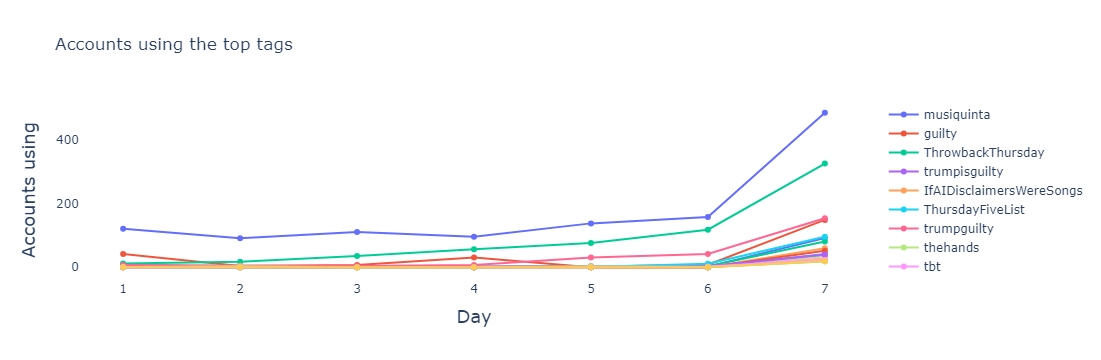

In [37]:
### Creating a plot displaying the number of accounts using a given tag over the last 7 days
# (day 7 = today)

fig = go.Figure()
for tag in file2['name'].unique():
    df_tag = file2[file2['name'] == tag]
    fig.add_trace(go.Scatter(x=df_tag['days'], y=df_tag['accounts_using'], name = tag))

fig.update_layout(
    plot_bgcolor="white",
    title = 'Accounts using the top tags',
    xaxis = {
        'title' :{
            'font' : {
                'size' : 18
            },
            'text' : 'Day'
        }
    },
    yaxis = {
        'title' :{
            'font' : {
                'size' : 18
            },
            'text' : 'Accounts using'
        }
    }
)

fig.show()

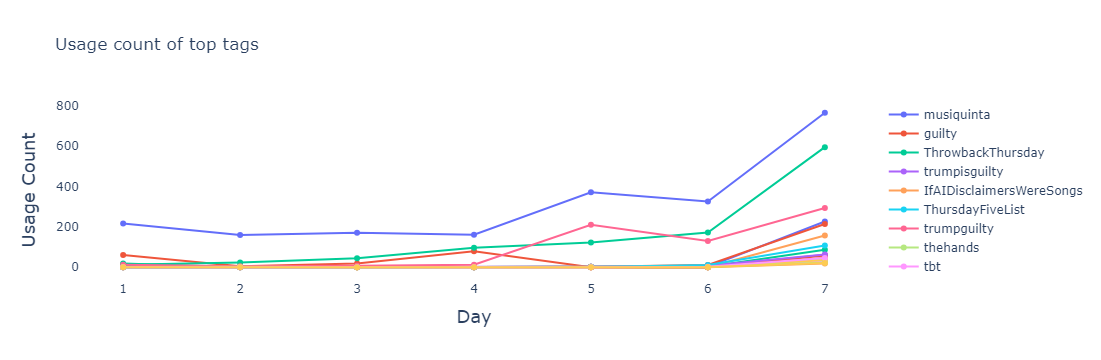

In [24]:
### Creating a plot displaying the usage count of different tags over the last 7 days

fig = go.Figure()
for tag in file2['name'].unique():
    df_tag = file2[file2['name'] == tag]
    fig.add_trace(go.Scatter(x=df_tag['days'], y=df_tag['usage_count'], name = tag))

fig.update_layout(
    plot_bgcolor="white",
    title = 'Usage count of top tags',
    xaxis = {
        'title' :{
            'font' : {
                'size' : 18
            },
            'text' : 'Day'
        }
    },
    yaxis = {
        'title' :{
            'font' : {
                'size' : 18
            },
            'text' : 'Usage Count'
        }
    }
)

fig.show()

                            OLS Regression Results                            
Dep. Variable:         accounts_using   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     2502.
Date:                Fri, 31 May 2024   Prob (F-statistic):           2.50e-90
Time:                        11:31:53   Log-Likelihood:                -561.71
No. Observations:                 140   AIC:                             1127.
Df Residuals:                     138   BIC:                             1133.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6253      1.218      0.513      

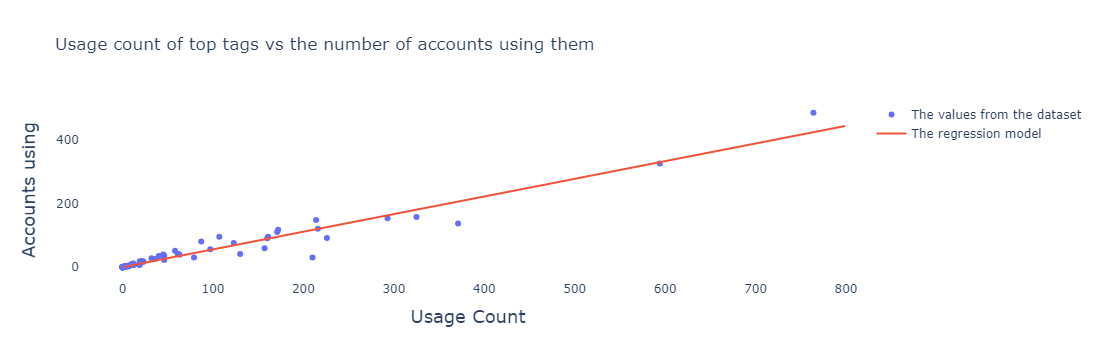

In [67]:
### Creating a scatter plot with the usage count and the number of accounts using the most popular tags
# in the plot the actual tag isn't displayed (it can be done by uncommenting the 3 three lines below, but you cant see that much with it)
# theres also a regression model plotted with the rest

fig = go.Figure()

fig.add_trace(go.Scatter(x=file2['usage_count'],y=file2['accounts_using'], mode = 'markers', name = 'The values from the dataset'))
#for tag in file2['name'].unique():
#    df_tag = file2[file2['name'] == tag]
#    fig.add_trace(go.Scatter(x=df_tag['usage_count'],y=df_tag['accounts_using'], mode = 'markers', name = tag))

const = sm.add_constant(file2['usage_count'])
model = sm.OLS(file2['accounts_using'],const)
res = model.fit()
print(res.summary())

fig.update_layout(
    plot_bgcolor="white",
    title = 'Usage count of top tags vs the number of accounts using them',
    xaxis = {
        'title' :{
            'font' : {
                'size' : 18
            },
            'text' : 'Usage Count'
        }
    },
    yaxis = {
        'title' :{
            'font' : {
                'size' : 18
            },
            'text' : 'Accounts using'
        }
    }
)

c,m = res.params
x = np.array(range(0,800))
y = m*x+c
fig.add_trace(go.Scatter(x=x, y=y, name = 'The regression model'))

fig.show()

                            OLS Regression Results                            
Dep. Variable:         accounts_using   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     2502.
Date:                Fri, 31 May 2024   Prob (F-statistic):           2.50e-90
Time:                        11:24:47   Log-Likelihood:                -561.71
No. Observations:                 140   AIC:                             1127.
Df Residuals:                     138   BIC:                             1133.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6253      1.218      0.513      

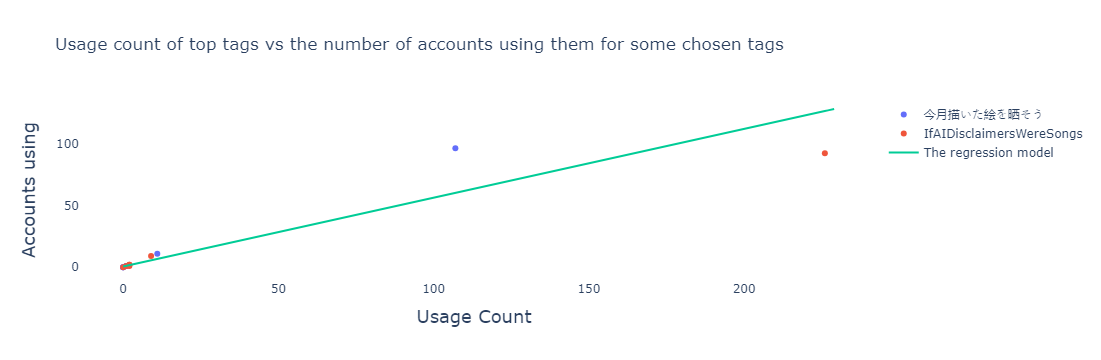

In [58]:
### mostly the same plot as the scatter plot before but only the values of two tags are plotted
# (the regression model used is still the one with every tag as data)
# could be maybe used to show that the regression doesn't fit all the different tags / the values of the regression model aren't the same
# for every tag

fig = go.Figure()

#fig.add_trace(go.Scatter(x=file2['usage_count'],y=file2['accounts_using'], mode = 'markers', name = 'The values from the dataset'))
#for tag in file2['name'].unique():
df_tag = file2[file2['name'] == '今月描いた絵を晒そう']
#print(df_tag)
fig.add_trace(go.Scatter(x=df_tag['usage_count'],y=df_tag['accounts_using'], mode = 'markers', name = '今月描いた絵を晒そう'))

df_tag = file2[file2['name'] == 'musiquinta']
#print(df_tag)
fig.add_trace(go.Scatter(x=df_tag['usage_count'],y=df_tag['accounts_using'], mode = 'markers', name = 'IfAIDisclaimersWereSongs'))

const = sm.add_constant(file2['usage_count'])
model = sm.OLS(file2['accounts_using'],const)
res = model.fit()
print(res.summary())

fig.update_layout(
    plot_bgcolor="white",
    title = 'Usage count of top tags vs the number of accounts using them for some chosen tags',
    xaxis = {
        'title' :{
            'font' : {
                'size' : 18
            },
            'text' : 'Usage Count'
        }
    },
    yaxis = {
        'title' :{
            'font' : {
                'size' : 18
            },
            'text' : 'Accounts using'
        }
    }
)

c,m = res.params
x = np.array(range(0,230))
y = m*x+c
fig.add_trace(go.Scatter(x=x, y=y, name = 'The regression model'))

fig.show()

In [91]:
### Looking into the different parameters of regression models, this time we create a regression model for every single tag
# and save the corresponding parameters in a dataFrame to plot it later

c_values = []
slope_values = []
tag_names = []


for tag in file2['name'].unique():
    df_tag = file2[file2['name'] == tag]
    const = sm.add_constant(df_tag['usage_count'])
    model = sm.OLS(df_tag['accounts_using'],const)
    res = model.fit()
    c,m = res.params
    c_values.append(c)
    slope_values.append(m)
    tag_names.append(tag)

regression_df = pd.DataFrame({'tag': tag_names, 'slope': slope_values, 'y Intercept': c_values})

regression_df

,tag,slope,y Intercept
0,musiquinta,0.401481,1.405959e+00
1,guilty,0.695390,1.949872e-01
2,ThrowbackThursday,0.927432,-1.002498e+00
3,trumpisguilty,0.680955,-3.476533e-01
4,IfAIDisclaimersWereSongs,0.382166,-1.604348e-15
5,ThursdayFiveList,0.888889,-2.524023e-15
6,trumpguilty,0.804348,1.123233e-16
7,thehands,0.875000,2.519686e-15
8,tbt,0.871901,1.239669e-01
9,Felon,0.722222,-1.026089e-15


Text(0.5, 1.0, 'tets')

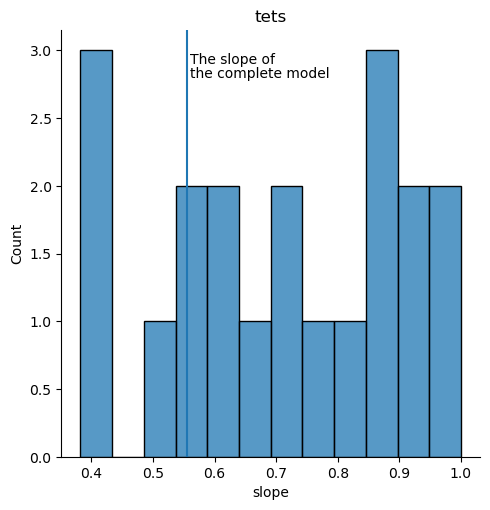

In [133]:
const = sm.add_constant(file2['usage_count'])
model = sm.OLS(file2['accounts_using'],const)
res = model.fit()
c_all,m_all = res.params

sns.displot(regression_df, x='slope', binwidth = 0.05)
#sns.displot(regression_df, x='slope', binwidth = 0.05, kde = True)
plt.axvline(m_all, 0,3)
plt.text(m_all+0.005,2.9, 'The slope of')
plt.text(m_all+0.005,2.8, 'the complete model')
plt.title('tets')

Text(7.5, 1.3, 'GPN22')

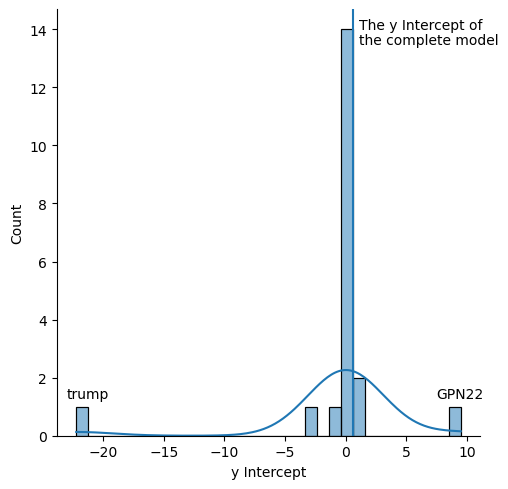

In [113]:
### The distribution of the different y Intercept values of the different regression models for each tag
# with a mark what the two outliers are

sns.displot(regression_df, x='y Intercept',binwidth = 1, kde = True)
#sns.displot(regression_df, x='slope', binwidth = 0.05, kde = True)
plt.axvline(c_all, 0,3)
plt.text(c_all+0.5,14, 'The y Intercept of')
plt.text(c_all+0.5,13.5, 'the complete model')
plt.text(-23,1.3,'trump')
plt.text(7.5,1.3,'GPN22')

                                 OLS Regression Results                                
Dep. Variable:         accounts_using   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              2901.
Date:                Fri, 31 May 2024   Prob (F-statistic):                    5.27e-95
Time:                        11:56:21   Log-Likelihood:                         -561.85
No. Observations:                 140   AIC:                                      1126.
Df Residuals:                     139   BIC:                                      1129.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

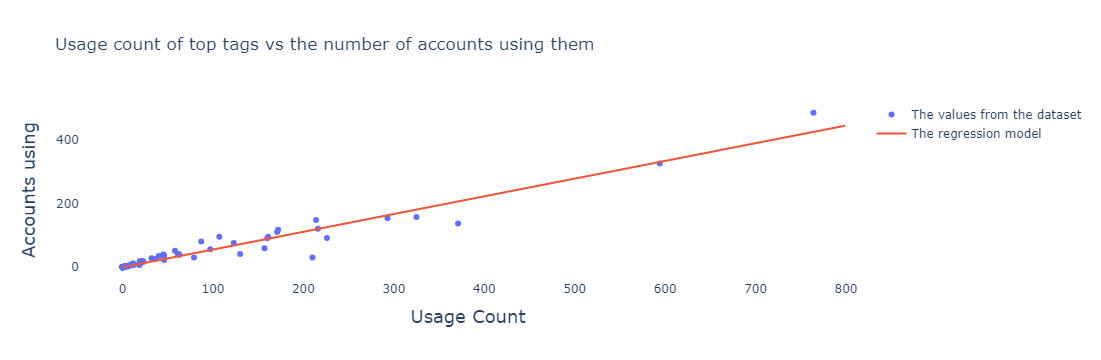

In [120]:
### The same as above (Scatterplot + regression) but this time we dont add a constant to the model
# (meaning instead of y = mx+c we only have y = mx)

fig = go.Figure()

fig.add_trace(go.Scatter(x=file2['usage_count'],y=file2['accounts_using'], mode = 'markers', name = 'The values from the dataset'))
#for tag in file2['name'].unique():
#    df_tag = file2[file2['name'] == tag]
#    fig.add_trace(go.Scatter(x=df_tag['usage_count'],y=df_tag['accounts_using'], mode = 'markers', name = tag))

model = sm.OLS(file2['accounts_using'],file2['usage_count'])
res = model.fit()
print(res.summary())

fig.update_layout(
    plot_bgcolor="white",
    title = 'Usage count of top tags vs the number of accounts using them',
    xaxis = {
        'title' :{
            'font' : {
                'size' : 18
            },
            'text' : 'Usage Count'
        }
    },
    yaxis = {
        'title' :{
            'font' : {
                'size' : 18
            },
            'text' : 'Accounts using'
        }
    }
)

m = res.params.iloc[0]
x = np.array(range(0,800))
y = m*x
fig.add_trace(go.Scatter(x=x, y=y, name = 'The regression model'))

fig.show()

Model without constant, m=0.5573
Model with constant, m=0.5553 and c=0.6253


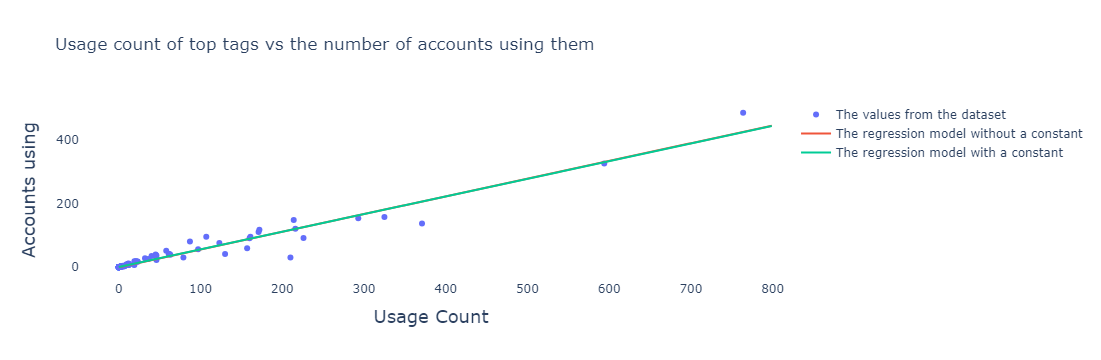

In [137]:
### Comparision between the model with a constant and the one without a constant
# They look really similar so i dont think this would be useful in the presentation but im still leaving it here

fig = go.Figure()

fig.add_trace(go.Scatter(x=file2['usage_count'],y=file2['accounts_using'], mode = 'markers', name = 'The values from the dataset'))
#for tag in file2['name'].unique():
#    df_tag = file2[file2['name'] == tag]
#    fig.add_trace(go.Scatter(x=df_tag['usage_count'],y=df_tag['accounts_using'], mode = 'markers', name = tag))

model = sm.OLS(file2['accounts_using'],file2['usage_count'])
res = model.fit()

fig.update_layout(
    plot_bgcolor="white",
    title = 'Usage count of top tags vs the number of accounts using them',
    xaxis = {
        'title' :{
            'font' : {
                'size' : 18
            },
            'text' : 'Usage Count'
        }
    },
    yaxis = {
        'title' :{
            'font' : {
                'size' : 18
            },
            'text' : 'Accounts using'
        }
    }
)

m = res.params.iloc[0]
x = np.array(range(0,800))
y = m*x
fig.add_trace(go.Scatter(x=x, y=y, name = 'The regression model without a constant'))
const = sm.add_constant(file2['usage_count'])
model = sm.OLS(file2['accounts_using'],const)
res = model.fit()
print(f'Model without constant, m={round(m,4)}')

c,m = res.params
x = np.array(range(0,800))
y = m*x+c
fig.add_trace(go.Scatter(x=x, y=y, name = 'The regression model with a constant'))
print(f'Model with constant, m={round(m,4)} and c={round(c,4)}')
fig.show()

In [122]:
### Looking into the alopw parameters of regression models where no constant is added
# this time we create a regression model for every single tag
# and save the corresponding parameters in a dataFrame to plot it later

slope_values = []
tag_names = []


for tag in file2['name'].unique():
    df_tag = file2[file2['name'] == tag]
    model = sm.OLS(df_tag['accounts_using'],df_tag['usage_count'])
    res = model.fit()
    m = res.params.iloc[0]
    slope_values.append(m)
    tag_names.append(tag)

regression_df = pd.DataFrame({'tag': tag_names, 'slope': slope_values})

regression_df

,tag,slope
0,musiquinta,0.408130
1,guilty,0.696371
2,ThrowbackThursday,0.913483
3,trumpisguilty,0.674097
4,IfAIDisclaimersWereSongs,0.382166
5,ThursdayFiveList,0.888889
6,trumpguilty,0.804348
7,thehands,0.875000
8,tbt,0.876448
9,Felon,0.722222


Another interpretation of this model is that every person using a tag posts on average 1.7943 posts using that tag in a week


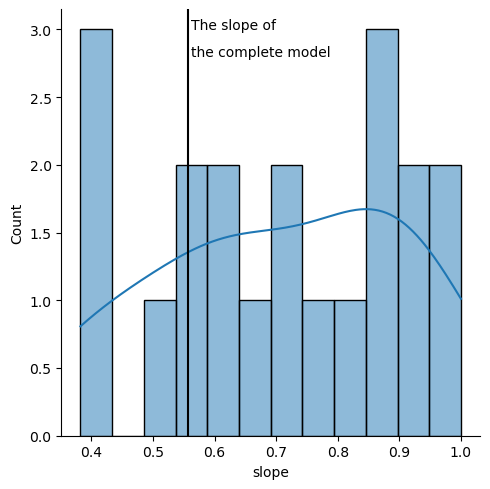

In [129]:

model = sm.OLS(file2['accounts_using'],file2['usage_count'])
res = model.fit()
m_all = res.params.iloc[0]

#sns.displot(regression_df, x='slope', binwidth = 0.05)
sns.displot(regression_df, x='slope', binwidth = 0.05, kde = True)
plt.axvline(m_all, 0,3, color = 'black')
plt.text(m_all+0.005,3, 'The slope of')
plt.text(m_all+0.005,2.8, 'the complete model')

print(f'Another interpretation of this model is that every person using a tag posts on average {round(1/m_all,4)} posts using that tag in a week')